In [123]:
# !pip install scanpy -q
# !pip install anndata -q


Primary Libraries - 

- **Scanpy** = Open-source Python library for single-cell RNA sequencing (scRNA-seq) analysis. It provides a comprehensive toolkit for quality control, visualization, preprocessing, clustering, differential expression analysis, trajectory inference

- **Anndata** = Provides a flexible and efficient way to store, manipulate, and analyze scRNA-seq data

### Importing other libraries

In [124]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

### Reading in the data

In [125]:
sp_data_folder = '/Users/karandeepsinghnanda/Documents/VSCode/RNA data/mouse_brain_visium_wo_cloupe_data/rawdata/ST8059048'
sp_data_folder

'/Users/karandeepsinghnanda/Documents/VSCode/RNA data/mouse_brain_visium_wo_cloupe_data/rawdata/ST8059048'

In [126]:
adata = sc.read_visium(sp_data_folder, count_file='/Users/karandeepsinghnanda/Documents/VSCode/RNA data/mouse_brain_visium_wo_cloupe_data/rawdata/ST8059048/filtered_feature_bc_matrix.h5', load_images=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [127]:
adata.var_names_make_unique()

In [128]:
adata

AnnData object with n_obs × n_vars = 2987 × 31053
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In this data set we see 2987 cells (n_obs) and 31053 genes (n_vars).

**n_obs** = refers to the number of observations or cells in the AnnData object(2987).


**n_vars** = refers to the number of variables or features in the AnnData object(31053).  In the context of scRNA-seq data, these variables typically represent genes.

**obs** = refers to the observation or cell-level metadata associated with each individual cell in the dataset. Represents the annotations or attributes specific to each cell.

In [129]:
adata.obs.head() #First column represents the barcode associated with each cell

in_tissue  array_row  array_col
AAACAAGTATCTCCCA-1          1         50        102
AAACACCAATAACTGC-1          1         59         19
AAACAGAGCGACTCCT-1          1         14         94
AAACAGCTTTCAGAAG-1          1         43          9
AAACAGGGTCTATATT-1          1         47         13

In [130]:
adata.var.head() # Gene representation

gene_ids    feature_types              genome
Xkr4     ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna
Gm1992   ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna
Gm37381  ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna
Rp1      ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna
Sox17    ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna

### Checking for the highest expressed genes!

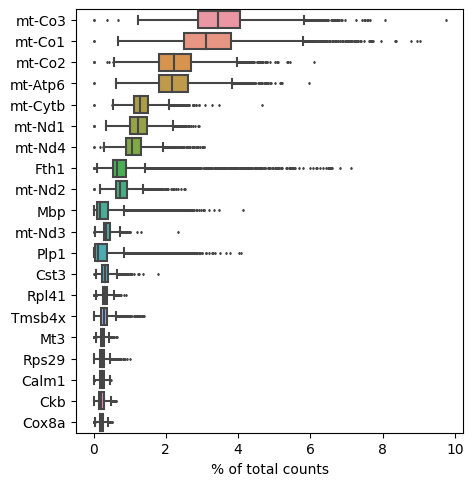

In [131]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [132]:
#Convert the sparse matrix into a dense matrix
dense_matrix= adata.X.toarray()

print(dense_matrix)

[[2. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [133]:
cell_index = 0

#Access the gene expression for a specific cell
gene_expression = adata.X[cell_index]

#Get the non-zero expression attributed to that gene index
expressed_gene_indices = gene_expression.nonzero()[1]

#Get the gene name from the 'var_names' attribute
expressed_genes = adata.var_names[expressed_gene_indices]

print(expressed_genes)

Index(['AC149090.1', 'mt-Cytb', 'mt-Nd5', 'mt-Nd4', 'mt-Nd4l', 'mt-Nd3',
       'mt-Co3', 'mt-Atp6', 'mt-Atp8', 'mt-Co2',
       ...
       'Ncoa2', 'A830018L16Rik', 'Cops5', 'Snhg6', '1700034P13Rik', 'Vcpip1',
       'Adhfe1', 'Sntg1', 'Atp6v1h', 'Xkr4'],
      dtype='object', length=4678)


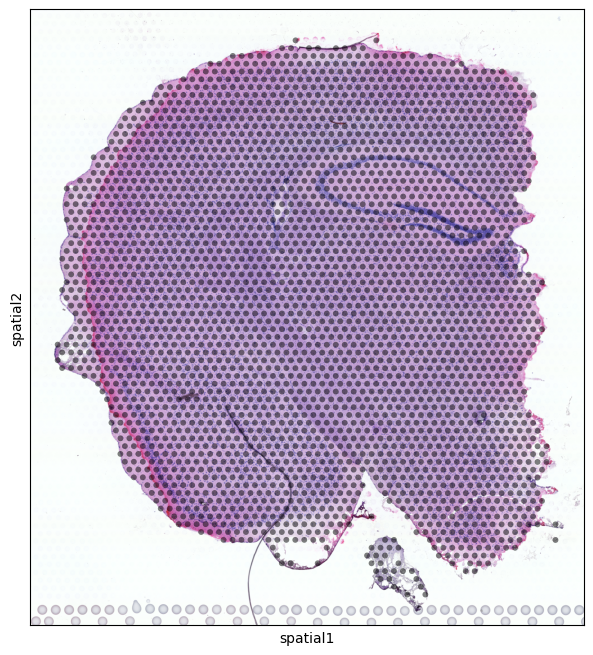

In [134]:
sc.pl.spatial(adata, img_key='hires', alpha=0.5)

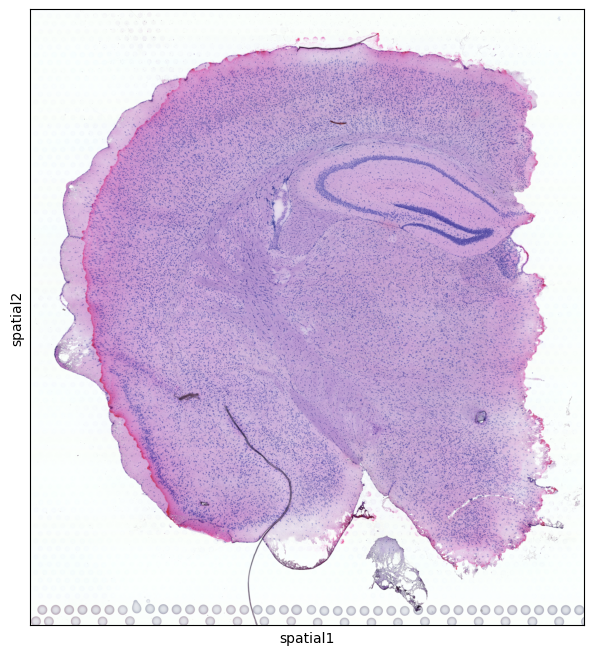

In [135]:
sc.pl.spatial(adata, img_key='hires', color=None) #Image with no overlay

In [136]:
gene_names = adata.var.index

print('IS Rorb gene present in the vars', 'Rorb' in gene_names)
print("Is Vip gene present in the vars?", "Vip" in gene_names)


IS Rorb gene present in the vars True
Is Vip gene present in the vars? True


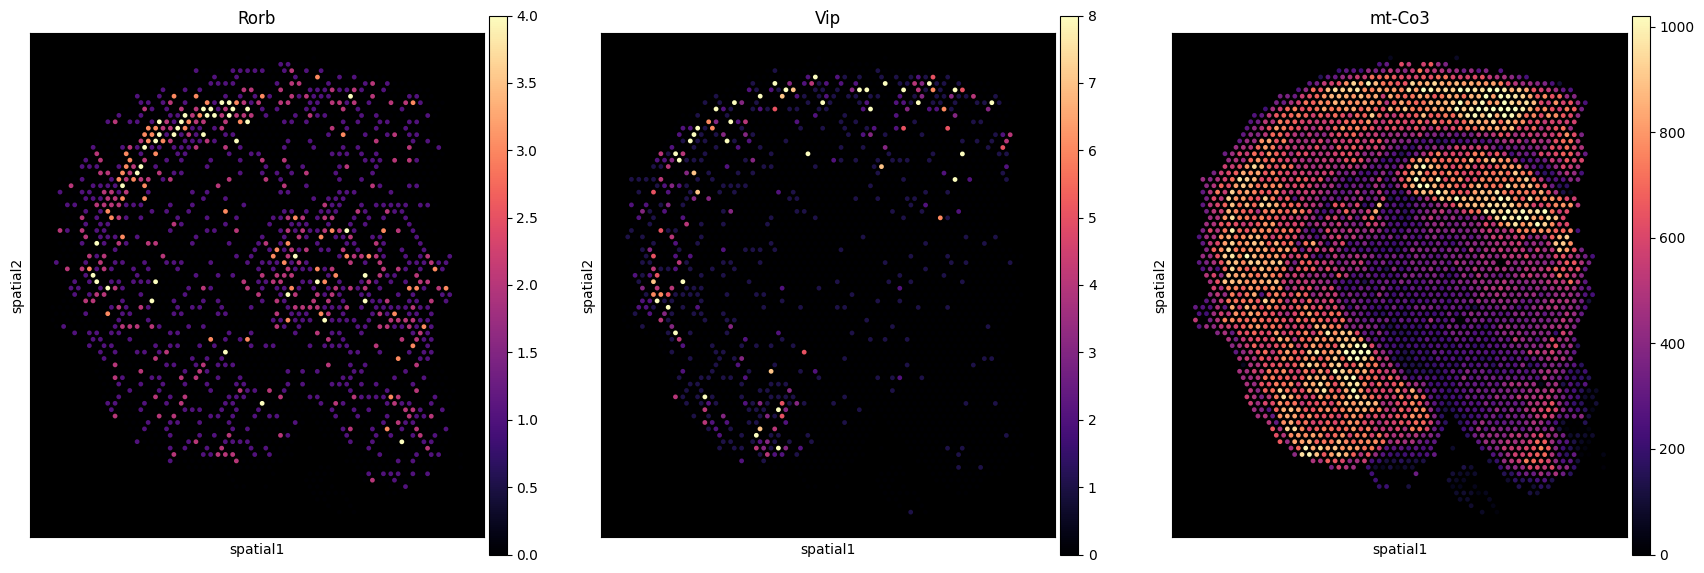

In [137]:
with mpl.rc_context({'figure.figsize': [6,7],
                     'axes.facecolor': 'black'}):
    sc.pl.spatial(adata, color=["Rorb", "Vip", "mt-Co3"], img_key=None, size=1,
                  vmin = 0, cmap = 'magma', vmax = 'p99.0',
                  gene_symbols = 'SYMBOL')


In [138]:
adata.var[adata.var.index.str.startswith('mt-')]


gene_ids    feature_types              genome
mt-Nd1   ENSMUSG00000064341  Gene Expression  mm10-3.0.0_premrna
mt-Nd2   ENSMUSG00000064345  Gene Expression  mm10-3.0.0_premrna
mt-Co1   ENSMUSG00000064351  Gene Expression  mm10-3.0.0_premrna
mt-Co2   ENSMUSG00000064354  Gene Expression  mm10-3.0.0_premrna
mt-Atp8  ENSMUSG00000064356  Gene Expression  mm10-3.0.0_premrna
mt-Atp6  ENSMUSG00000064357  Gene Expression  mm10-3.0.0_premrna
mt-Co3   ENSMUSG00000064358  Gene Expression  mm10-3.0.0_premrna
mt-Nd3   ENSMUSG00000064360  Gene Expression  mm10-3.0.0_premrna
mt-Nd4l  ENSMUSG00000065947  Gene Expression  mm10-3.0.0_premrna
mt-Nd4   ENSMUSG00000064363  Gene Expression  mm10-3.0.0_premrna
mt-Nd5   ENSMUSG00000064367  Gene Expression  mm10-3.0.0_premrna
mt-Nd6   ENSMUSG00000064368  Gene Expression  mm10-3.0.0_premrna
mt-Cytb  ENSMUSG00000064370  Gene Expression  mm10-3.0.0_premrna

In [139]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')

In [140]:
adata.var['mt'].value_counts()

mt
False    31040
True        13
Name: count, dtype: int64

In [141]:
ribo_genes = pd.read_csv('/Users/karandeepsinghnanda/Documents/VSCode/RNASeq-Analysis/KEGG_RIBOSOME.v2023.2.Hs.csv', skiprows=2, header=None)
ribo_genes

0
0          FAU
1       MRPL13
2        RPL10
3       RPL10A
4       RPL10L
..         ...
83        RPS9
84        RPSA
85     RSL24D1
86  RSL24D1P11
87       UBA52

[88 rows x 1 columns]

In [142]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
adata.var


gene_ids    feature_types              genome  \
Xkr4            ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna   
Gm1992          ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna   
Gm37381         ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna   
Rp1             ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna   
Sox17           ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna   
...                            ...              ...                 ...   
AC168977.1      ENSMUSG00000079808  Gene Expression  mm10-3.0.0_premrna   
AC149090.1      ENSMUSG00000095041  Gene Expression  mm10-3.0.0_premrna   
CAAA01118383.1  ENSMUSG00000063897  Gene Expression  mm10-3.0.0_premrna   
Vmn2r122        ENSMUSG00000096730  Gene Expression  mm10-3.0.0_premrna   
CAAA01147332.1  ENSMUSG00000095742  Gene Expression  mm10-3.0.0_premrna   

                   mt   ribo  
Xkr4            False  False  
Gm1992          False  False  
Gm37381         False  False  
Rp1             False  False  
Sox17           False  False  
...               ...    ...  
AC168977.1      False  False  
AC149090.1      False  False  
CAAA01118383.1  False  False  
Vmn2r122        False  False  
CAAA01147332.1  False  False  

[31053 rows x 5 columns]

In [143]:
adata

AnnData object with n_obs × n_vars = 2987 × 31053
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo'
    uns: 'spatial'
    obsm: 'spatial'

In [144]:
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", 'ribo'], inplace=True)



In [145]:
adata

AnnData object with n_obs × n_vars = 2987 × 31053
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

In [146]:
number_of_spots = adata.obs_names.shape[0]
mean_reads_per_spot = adata.obs['total_counts'].mean()
median_genes_per_spot = adata.obs['n_genes_by_counts'].median()

print("Number of spots under tissue:", number_of_spots)
print("Mean reads per spot:", mean_reads_per_spot)
print("Median genes per spot:", median_genes_per_spot)


Number of spots under tissue: 2987
Mean reads per spot: 15484.307
Median genes per spot: 4553.0


In [147]:
adata.obs

in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4678   
AAACACCAATAACTGC-1          1         59         19               3549   
AAACAGAGCGACTCCT-1          1         14         94               6779   
AAACAGCTTTCAGAAG-1          1         43          9               3108   
AAACAGGGTCTATATT-1          1         47         13               4515   
...                       ...        ...        ...                ...   
TTGTTCAGTGTGCTAC-1          1         24         64               8457   
TTGTTGTGTGTCAAGA-1          1         31         77               3464   
TTGTTTCACATCCAGG-1          1         58         42               5457   
TTGTTTCATTAGTCTA-1          1         60         30               5300   
TTGTTTCCATACAACT-1          1         45         27               5143   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.450840       14284.0            9.566965   
AAACACCAATAACTGC-1                 8.174703        9951.0            9.205529   
AAACAGAGCGACTCCT-1                 8.821732       32155.0           10.378354   
AAACAGCTTTCAGAAG-1                 8.042056        7935.0            8.979165   
AAACAGGGTCTATATT-1                 8.415382       14483.0            9.580800   
...                                     ...           ...                 ...   
TTGTTCAGTGTGCTAC-1                 9.042868       65866.0           11.095393   
TTGTTGTGTGTCAAGA-1                 8.150468        8785.0            9.080914   
TTGTTTCACATCCAGG-1                 8.604838       19956.0            9.901335   
TTGTTTCATTAGTCTA-1                 8.575651       18351.0            9.817493   
TTGTTTCCATACAACT-1                 8.545586       17529.0            9.771669   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   27.457295                    32.812938   
AAACACCAATAACTGC-1                   37.061602                    42.337454   
AAACAGAGCGACTCCT-1                   23.784792                    29.830508   
AAACAGCTTTCAGAAG-1                   32.917454                    39.054820   
AAACAGGGTCTATATT-1                   30.994960                    36.415107   
...                                        ...                          ...   
TTGTTCAGTGTGCTAC-1                   17.673762                    24.381320   
TTGTTGTGTGTCAAGA-1                   27.137166                    33.249858   
TTGTTTCACATCCAGG-1                   23.872520                    29.695330   
TTGTTTCATTAGTCTA-1                   24.892376                    30.477903   
TTGTTTCCATACAACT-1                   25.415027                    31.330937   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAAGTATCTCCCA-1                    39.897788                    52.856343   
AAACACCAATAACTGC-1                    49.110642                    60.586876   
AAACAGAGCGACTCCT-1                    37.860364                    51.397916   
AAACAGCTTTCAGAAG-1                    46.389414                    59.206049   
AAACAGGGTCTATATT-1                    43.506180                    56.031209   
...                                         ...                          ...   
TTGTTCAGTGTGCTAC-1                    33.152157                    48.190265   
TTGTTGTGTGTCAAGA-1                    41.343199                    55.310188   
TTGTTTCACATCCAGG-1                    37.748046                    51.638605   
TTGTTTCATTAGTCTA-1                    38.194104                    51.670209   
TTGTTTCCATACAACT-1                    39.505962                    53.191853   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACAAGTATCTCCCA-1           2847.0               7.954372      19.931393   
AAACACCAATAACTGC-1           2764.0               7.924796      27.776104   
AAACAGAGCGACTCCT-

<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

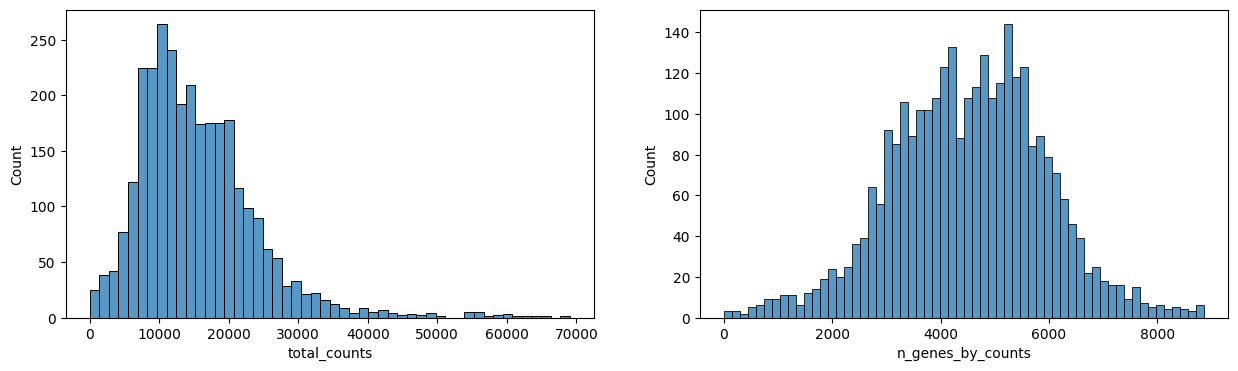

In [148]:
fig , axs = plt.subplots(1,2, figsize = (15,4))
sns.histplot(adata.obs['total_counts'], kde=False, ax=axs[0])
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[1])


In [149]:
adata.obs.sort_values('total_counts')

in_tissue  array_row  array_col  n_genes_by_counts  \
CACAGTCCCGCTTCGC-1          1         60        112                  3   
AGCGATGCGCCTAATA-1          1         64        108                 38   
AGATACCAATAGAACC-1          1         64        110                 66   
GGAGTTGATTCTGTGT-1          1         68        112                179   
AGAAGAGCGCCGTTCC-1          1         38         88                238   
...                       ...        ...        ...                ...   
CTGACTGCGCAGCTCG-1          1         31        101               8821   
TGGCCAAACTGAAGTA-1          1         28         76               8444   
CTAACGAAACTTGCTG-1          1         30         94               8861   
TTGTTCAGTGTGCTAC-1          1         24         64               8457   
CATGGTCTAGATACCG-1          1         26         66               8574   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
CACAGTCCCGCTTCGC-1                 1.386294           3.0            1.386294   
AGCGATGCGCCTAATA-1                 3.663562          43.0            3.784190   
AGATACCAATAGAACC-1                 4.204693          73.0            4.304065   
GGAGTTGATTCTGTGT-1                 5.192957         226.0            5.424950   
AGAAGAGCGCCGTTCC-1                 5.476464         295.0            5.690360   
...                                     ...           ...                 ...   
CTGACTGCGCAGCTCG-1                 9.085004       61512.0           11.027004   
TGGCCAAACTGAAGTA-1                 9.041330       62504.0           11.043002   
CTAACGAAACTTGCTG-1                 9.089528       63739.0           11.062568   
TTGTTCAGTGTGCTAC-1                 9.042868       65866.0           11.095393   
CATGGTCTAGATACCG-1                 9.056606       69102.0           11.143353   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
CACAGTCCCGCTTCGC-1                  100.000000                   100.000000   
AGCGATGCGCCTAATA-1                  100.000000                   100.000000   
AGATACCAATAGAACC-1                   78.082192                   100.000000   
GGAGTTGATTCTGTGT-1                   42.920354                    65.044248   
AGAAGAGCGCCGTTCC-1                   36.271186                    53.220339   
...                                        ...                          ...   
CTGACTGCGCAGCTCG-1                   17.407985                    23.345038   
TGGCCAAACTGAAGTA-1                   19.035582                    25.241585   
CTAACGAAACTTGCTG-1                   17.661087                    23.684087   
TTGTTCAGTGTGCTAC-1                   17.673762                    24.381320   
CATGGTCTAGATACCG-1                   18.657926                    25.209111   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
CACAGTCCCGCTTCGC-1                   100.000000                   100.000000   
AGCGATGCGCCTAATA-1                   100.000000                   100.000000   
AGATACCAATAGAACC-1                   100.000000                   100.000000   
GGAGTTGATTCTGTGT-1                   100.000000                   100.000000   
AGAAGAGCGCCGTTCC-1                    87.118644                   100.000000   
...                                         ...                          ...   
CTGACTGCGCAGCTCG-1                    31.385746                    45.608987   
TGGCCAAACTGAAGTA-1                    33.629848                    48.248112   
CTAACGAAACTTGCTG-1                    31.945904                    45.893409   
TTGTTCAGTGTGCTAC-1                    33.152157                    48.190265   
CATGGTCTAGATACCG-1                    33.799311                    48.848080   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
CACAGTCCCGCTTCGC-1              0.0               0.000000       0.000000   
AGCGATGCGCCTAATA-1              5.0               1.791759      11.627908   
AGATACCAATAGAACC-

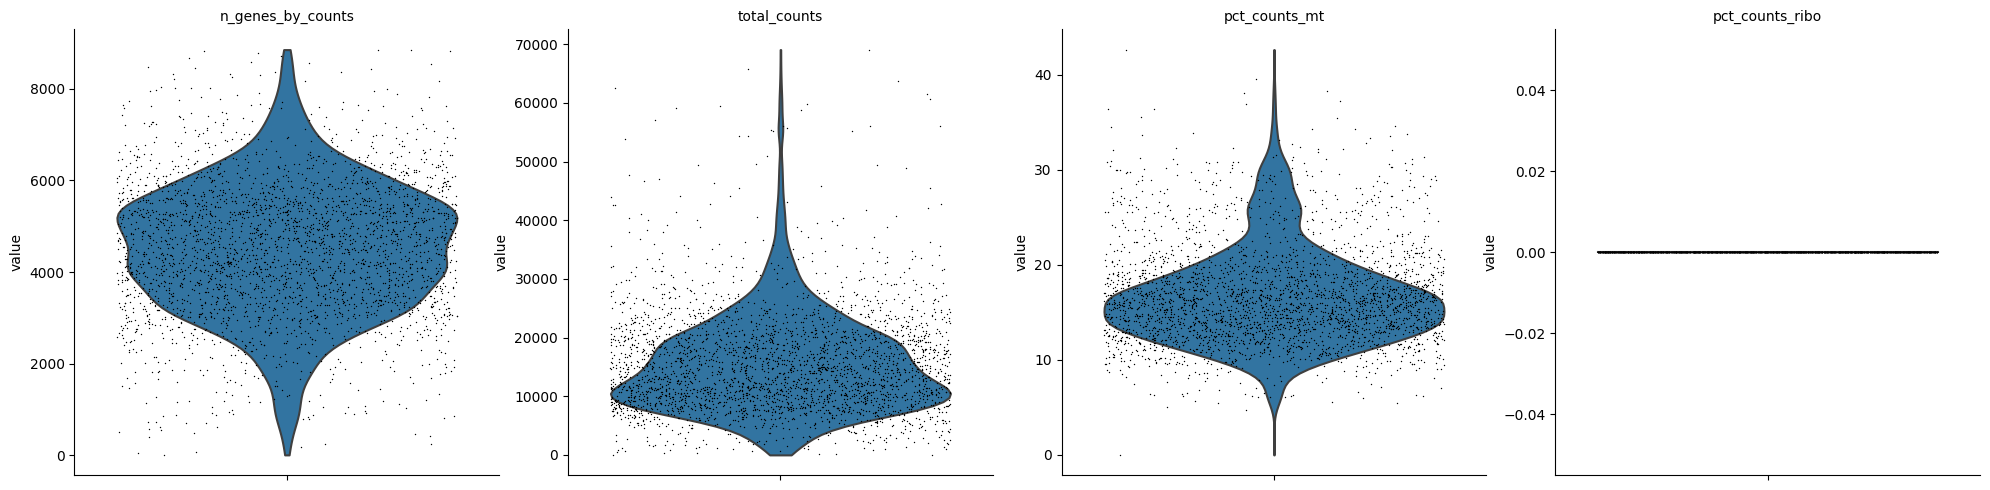

In [150]:

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)

In [151]:
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20]  
adata = adata[adata.obs["pct_counts_ribo"] < 2]

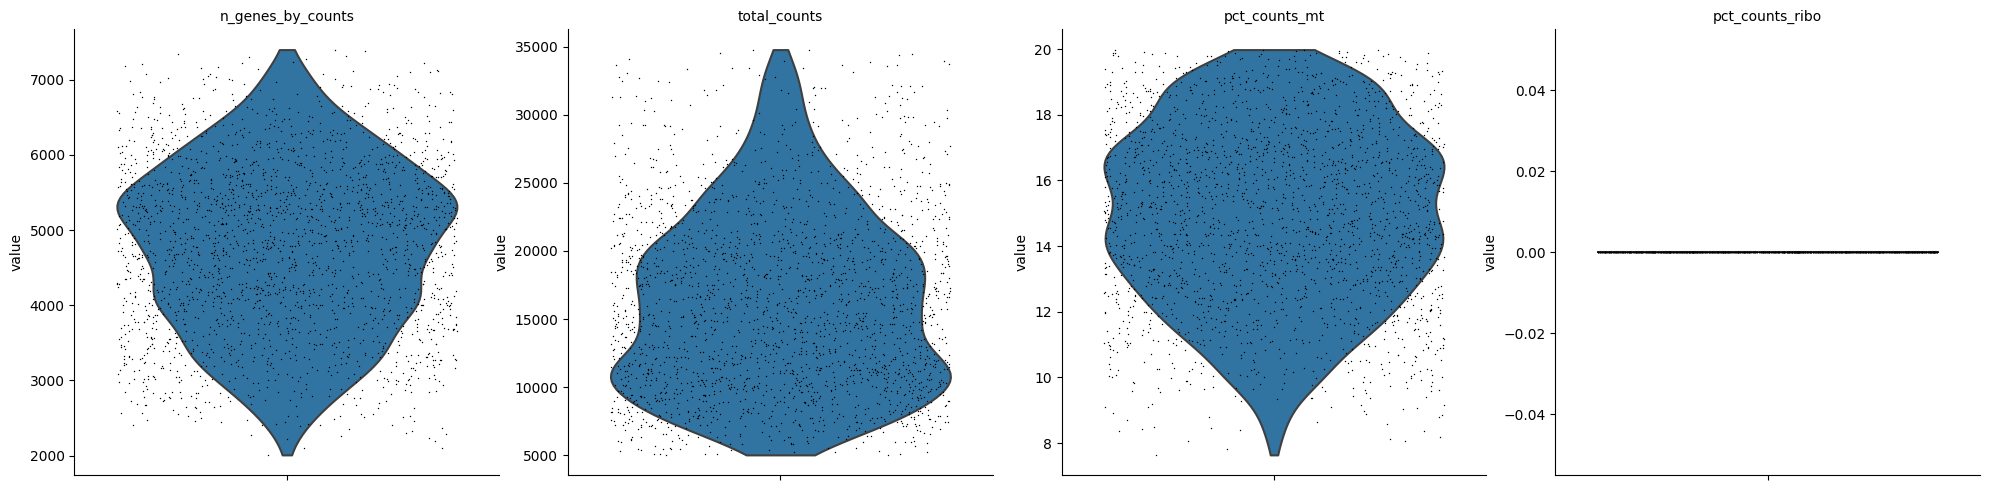

In [152]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)


### Analysis
- Normalize and log transformation

In [153]:
# Sum the gene expression counts across cells
gene_counts_sum = np.sum(adata.X, axis=0)
# Find the gene with the highest sum
gene_with_most_counts = adata.var_names[np.argmax(gene_counts_sum)]
print(f'Genes with the most count: {gene_with_most_counts}')     

Genes with the most count: mt-Co3


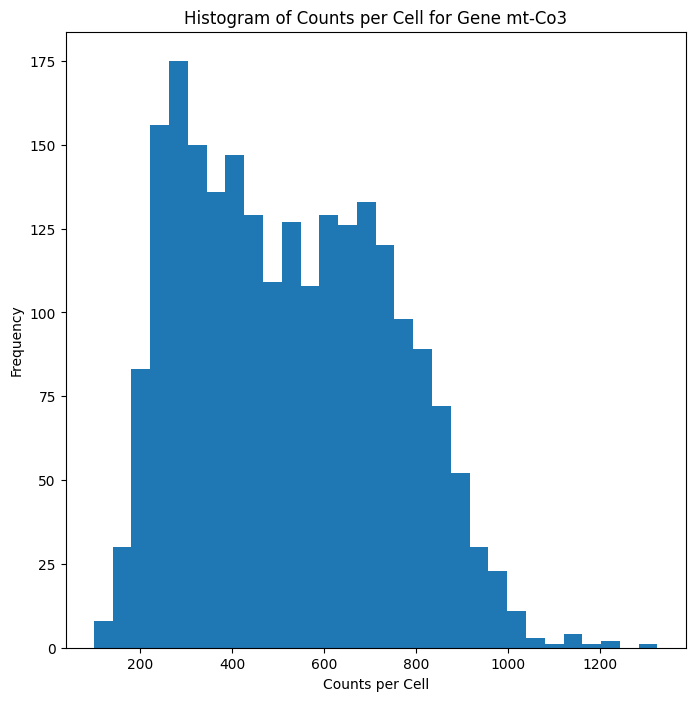

In [154]:
# Specify the gene name
gene_name = 'mt-Co3'

# Get the index of the gene in adata.var_names
gene_index = list(adata.var_names).index(gene_name)

# Extract the gene expression counts for the gene
gene_counts = adata.X[:, gene_index]

# Convert sparse matrix to array
gene_counts_array = gene_counts.toarray().flatten()

# Plot the histogram
plt.hist(gene_counts_array, bins=30)
plt.title(f"Histogram of Counts per Cell for Gene {gene_name}")
plt.xlabel("Counts per Cell")
plt.ylabel("Frequency")
plt.show()

In [155]:
sc.pp.normalize_total(adata, inplace=True, target_sum=1e4)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


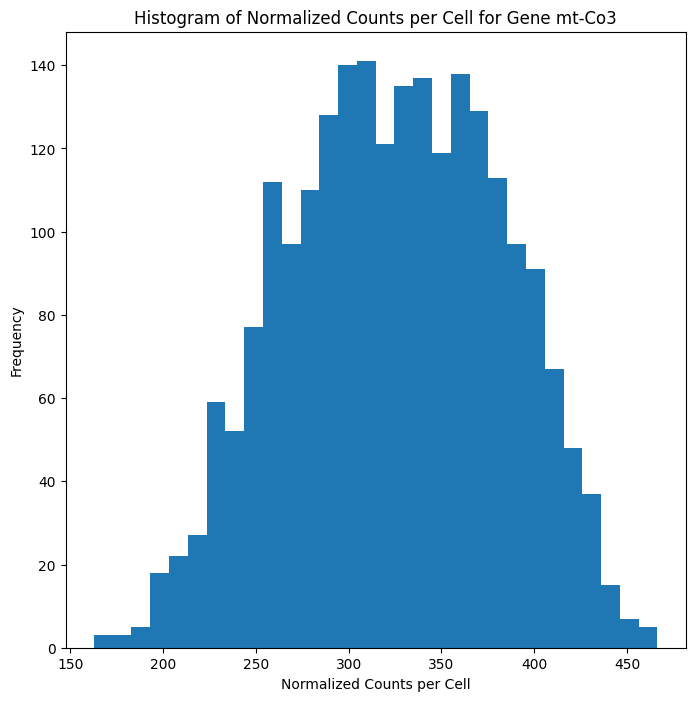

In [156]:
# Get the normalized gene expression counts for the gene
gene_counts_normalized = adata.X[:, gene_index]

# Convert sparse matrix to array
gene_counts_normalized_array = gene_counts_normalized.toarray().flatten()

# Plot the histogram
plt.hist(gene_counts_normalized_array, bins=30)
plt.title(f"Histogram of Normalized Counts per Cell for Gene {gene_name}")
plt.xlabel("Normalized Counts per Cell")
plt.ylabel("Frequency")
plt.show()

### By logging the data, we get the counts within a small range instead of orders of magnitude - 

In [157]:
sc.pp.log1p(adata)

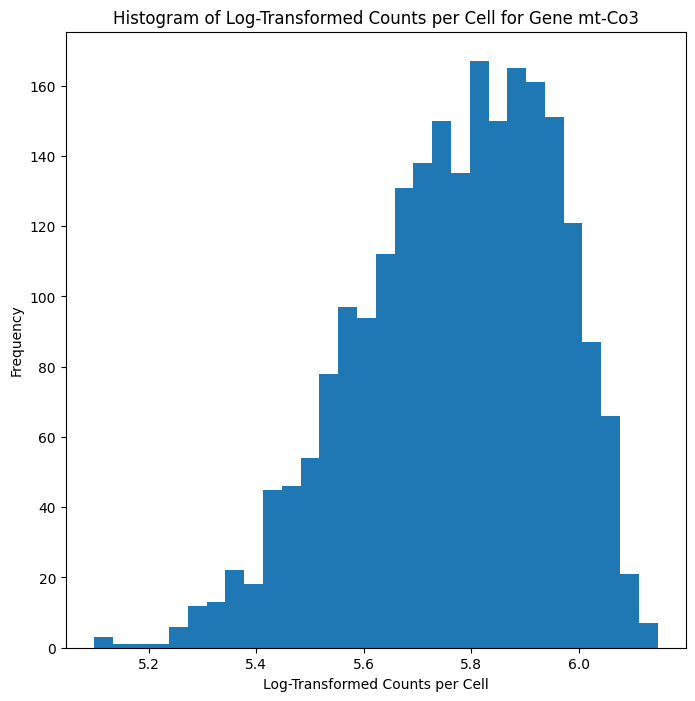

In [158]:
# Get the log-transformed gene expression counts for the gene
gene_counts_log_transformed = adata.X[:, gene_index]

# Convert sparse matrix to array
gene_counts_log_transformed_array = gene_counts_log_transformed.toarray().flatten()

# Plot the histogram
plt.hist(gene_counts_log_transformed_array, bins=30)
plt.title(f"Histogram of Log-Transformed Counts per Cell for Gene {gene_name}")
plt.xlabel("Log-Transformed Counts per Cell")
plt.ylabel("Frequency")
plt.show()

## Time to identify highly variable genes (Top 2000)

In [159]:
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [160]:
adata.var #There are now new columns (Highly_variable(bool), and some other calculation metrics)

gene_ids    feature_types              genome  \
Xkr4            ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna   
Gm1992          ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna   
Gm37381         ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna   
Rp1             ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna   
Sox17           ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna   
...                            ...              ...                 ...   
AC168977.1      ENSMUSG00000079808  Gene Expression  mm10-3.0.0_premrna   
AC149090.1      ENSMUSG00000095041  Gene Expression  mm10-3.0.0_premrna   
CAAA01118383.1  ENSMUSG00000063897  Gene Expression  mm10-3.0.0_premrna   
Vmn2r122        ENSMUSG00000096730  Gene Expression  mm10-3.0.0_premrna   
CAAA01147332.1  ENSMUSG00000095742  Gene Expression  mm10-3.0.0_premrna   

                   mt   ribo  n_cells_by_counts  mean_counts  \
Xkr4            False  False                672     0.275527   
Gm1992          False  False                  2     0.000670   
Gm37381         False  False                  0     0.000000   
Rp1             False  False                  8     0.002678   
Sox17           False  False                126     0.044191   
...               ...    ...                ...          ...   
AC168977.1      False  False                  0     0.000000   
AC149090.1      False  False               1524     0.933713   
CAAA01118383.1  False  False                567     0.222631   
Vmn2r122        False  False                  0     0.000000   
CAAA01147332.1  False  False                  2     0.000670   

                log1p_mean_counts  pct_dropout_by_counts  total_counts  \
Xkr4                     0.243360              77.502511         823.0   
Gm1992                   0.000669              99.933043           2.0   
Gm37381                  0.000000             100.000000           0.0   
Rp1                      0.002675              99.732173           8.0   
Sox17                    0.043243              95.781721         132.0   
...                           ...                    ...           ...   
AC168977.1               0.000000             100.000000           0.0   
AC149090.1               0.659442              48.978909        2789.0   
CAAA01118383.1           0.201005              81.017744         665.0   
Vmn2r122                 0.000000             100.000000           0.0   
CAAA01147332.1           0.000669              99.933043           2.0   

                log1p_total_counts  highly_variable         means  \
Xkr4                      6.714170             True  1.802254e-01   
Gm1992                    1.098612            False  5.222276e-04   
Gm37381                   0.000000            False  1.000000e-12   
Rp1                       2.197225            False  2.413300e-03   
Sox17                     4.890349            False  3.074923e-02   
...                            ...              ...           ...   
AC168977.1                0.000000            False  1.000000e-12   
AC149090.1                7.933797            False  4.417911e-01   
CAAA01118383.1            6.501290            False  1.429116e-01   
Vmn2r122                  0.000000            False  1.000000e-12   
CAAA01147332.1            1.098612            False  5.059126e-04   

                dispersions  dispersions_norm  
Xkr4               0.046397          1.193498  
Gm1992            -0.455997         -0.646364  
Gm37381                 NaN               NaN  
Rp1               -0.277748          0.006417  
Sox17             -0.167395          0.410549  
...                     ...               ...  
AC168977.1              NaN               NaN  
AC149090.1        -0.263542         -0.396476  
CAAA01118383.1    -0.197004          0.302115  
Vmn2r122                NaN               NaN  
CAAA01147332.1    -0.554695         -1.007815  

[31053 rows x 15 columns]

### Create a plot for the gene expression dispersion

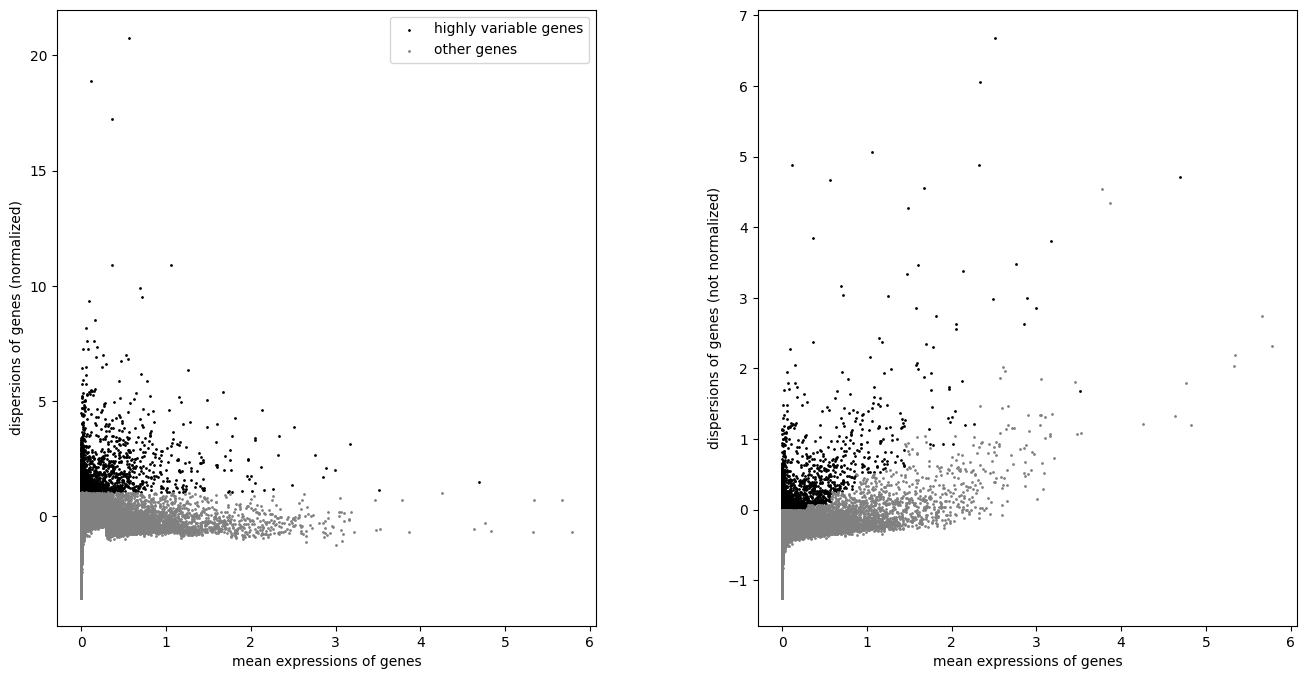

In [161]:
sc.pl.highly_variable_genes(adata)

## Dimensionality Reduction = PCA

In [162]:
adata = adata[:, adata.var.highly_variable]


In [163]:
sc.pp.pca(adata)

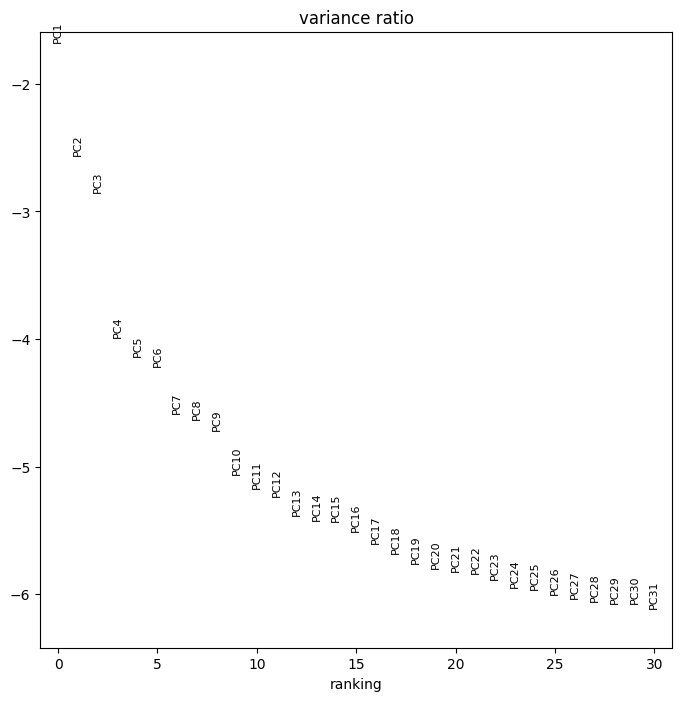

In [164]:
sc.pl.pca_variance_ratio(adata, log = True)

- Let' use the top 20 for saturation and calculate neighbors

In [165]:
sc.pp.neighbors(adata, n_pcs=20)


Explain the umap 

In [166]:
sc.tl.umap(adata, n_components=2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


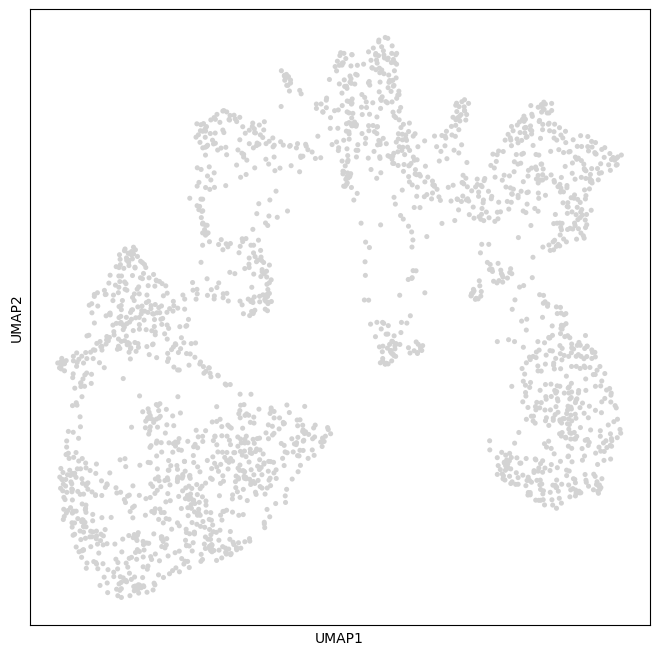

In [167]:
sc.pl.umap(adata)

In [168]:
sorted_by_num_cells = adata.var['n_cells_by_counts'].sort_values(ascending=False)
sorted_by_num_cells

Gm42418          2985
Cst3             2985
Fth1             2982
Malat1           2962
Dbi              2955
                 ... 
Gm28901             1
Gm47757             1
Gm16185             1
4930502A04Rik       1
Gm42849             1
Name: n_cells_by_counts, Length: 2000, dtype: int64

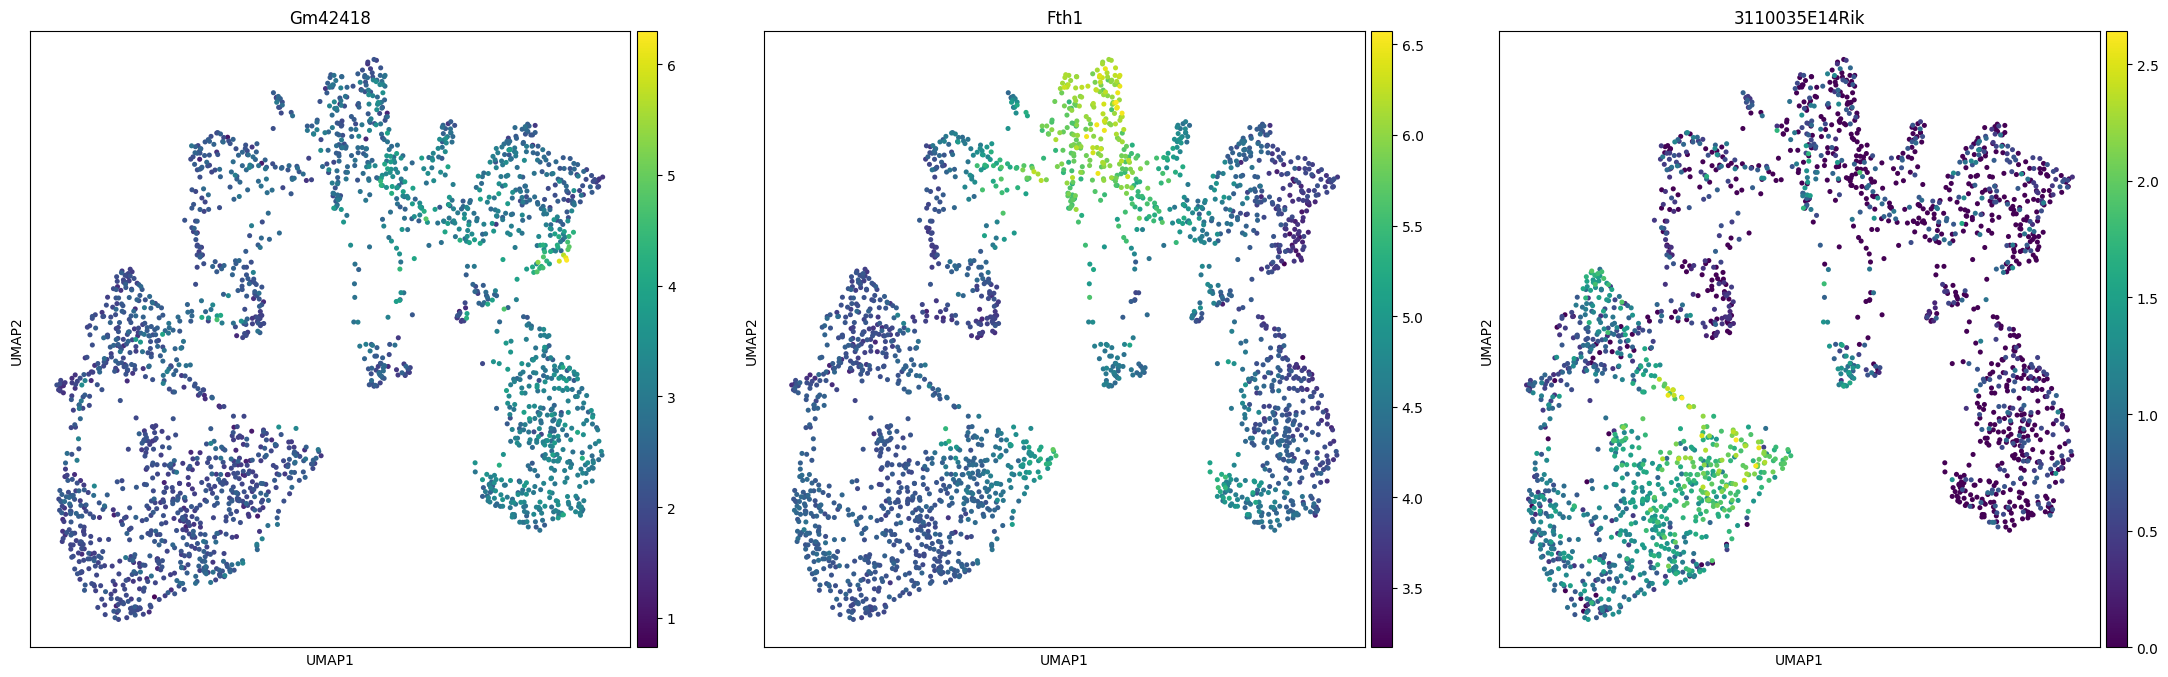

In [169]:
sc.pl.umap(adata, color=["Gm42418", "Fth1", "3110035E14Rik"])


In [170]:
#!pip install leidenalg

## Applying the leiden alg

In [171]:
sc.tl.leiden(adata, resolution=0.6, key_added="clusters") #Experiment with values 0.3, 0.6, and 1.0. View the result in the UMAP plot below. 

In [172]:
adata.obs

in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4678   
AAACAGAGCGACTCCT-1          1         14         94               6779   
AAACATTTCCCGGATT-1          1         61         97               5784   
AAACCGGGTAGGTACC-1          1         42         28               6334   
AAACCGTTCGTCCAGG-1          1         52         42               6843   
...                       ...        ...        ...                ...   
TTGTTAGCAAATTCGA-1          1         22         42               5553   
TTGTTGTGTGTCAAGA-1          1         31         77               3464   
TTGTTTCACATCCAGG-1          1         58         42               5457   
TTGTTTCATTAGTCTA-1          1         60         30               5300   
TTGTTTCCATACAACT-1          1         45         27               5143   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.450840       14284.0            9.566965   
AAACAGAGCGACTCCT-1                 8.821732       32155.0           10.378354   
AAACATTTCCCGGATT-1                 8.663024       20669.0            9.936439   
AAACCGGGTAGGTACC-1                 8.753845       27359.0           10.216837   
AAACCGTTCGTCCAGG-1                 8.831128       30272.0           10.318011   
...                                     ...           ...                 ...   
TTGTTAGCAAATTCGA-1                 8.622274       19896.0            9.898324   
TTGTTGTGTGTCAAGA-1                 8.150468        8785.0            9.080914   
TTGTTTCACATCCAGG-1                 8.604838       19956.0            9.901335   
TTGTTTCATTAGTCTA-1                 8.575651       18351.0            9.817493   
TTGTTTCCATACAACT-1                 8.545586       17529.0            9.771669   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   27.457295                    32.812938   
AAACAGAGCGACTCCT-1                   23.784792                    29.830508   
AAACATTTCCCGGATT-1                   21.147612                    27.350138   
AAACCGGGTAGGTACC-1                   22.310757                    28.389196   
AAACCGTTCGTCCAGG-1                   20.025106                    26.149577   
...                                        ...                          ...   
TTGTTAGCAAATTCGA-1                   22.502010                    28.784680   
TTGTTGTGTGTCAAGA-1                   27.137166                    33.249858   
TTGTTTCACATCCAGG-1                   23.872520                    29.695330   
TTGTTTCATTAGTCTA-1                   24.892376                    30.477903   
TTGTTTCCATACAACT-1                   25.415027                    31.330937   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAAGTATCTCCCA-1                    39.897788                    52.856343   
AAACAGAGCGACTCCT-1                    37.860364                    51.397916   
AAACATTTCCCGGATT-1                    35.744351                    50.374958   
AAACCGGGTAGGTACC-1                    36.496217                    50.506232   
AAACCGTTCGTCCAGG-1                    34.556686                    48.592759   
...                                         ...                          ...   
TTGTTAGCAAATTCGA-1                    36.886811                    50.914757   
TTGTTGTGTGTCAAGA-1                    41.343199                    55.310188   
TTGTTTCACATCCAGG-1                    37.748046                    51.638605   
TTGTTTCATTAGTCTA-1                    38.194104                    51.670209   
TTGTTTCCATACAACT-1                    39.505962                    53.191853   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACAAGTATCTCCCA-1           2847.0               7.954372      19.931393   
AAACAGAGCGACTCCT-1           4866.0               8.490233      15.132950   
AAACATTTCCCGGATT-

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


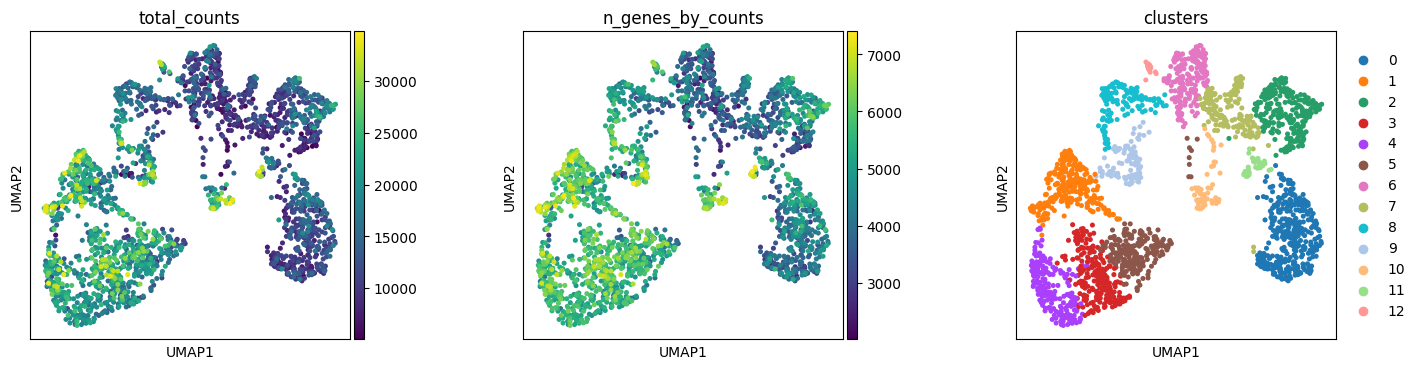

In [173]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)
     


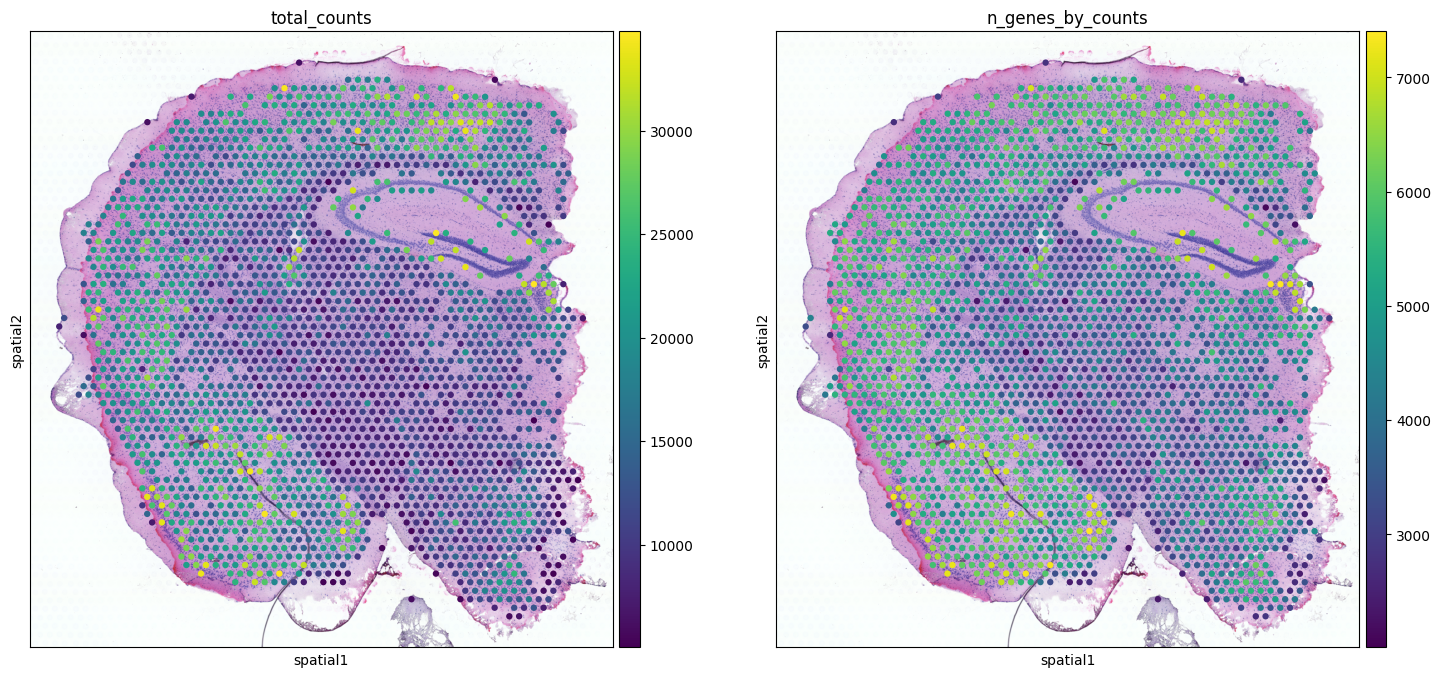

In [174]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])
     

- The clustering algorithm assigns each cell to a specific cluster based on similiarity in gene expression

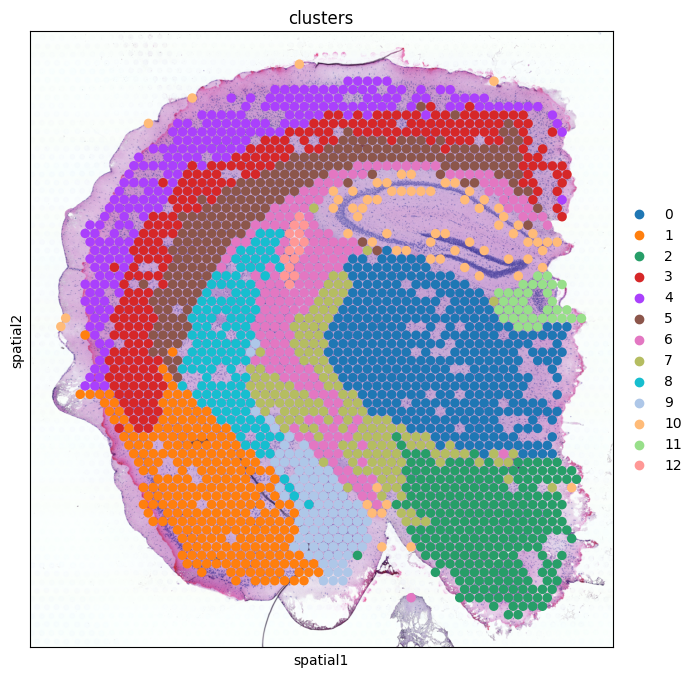

In [175]:
plt.rcParams['figure.figsize'] = (8,8)
sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)


### Focus on a smaller region

In [176]:
xmin = adata.obsm['spatial'][:, 0].min()
xmax = adata.obsm['spatial'][:, 0].max()
ymin = adata.obsm['spatial'][:, 1].min()
ymax = adata.obsm['spatial'][:, 1].max()

print('x-cordinate range', xmin, 'to', xmax)

print('x-cordinate range', ymin, 'to', ymax)

x-cordinate range 2278 to 13997
x-cordinate range 2636 to 15026


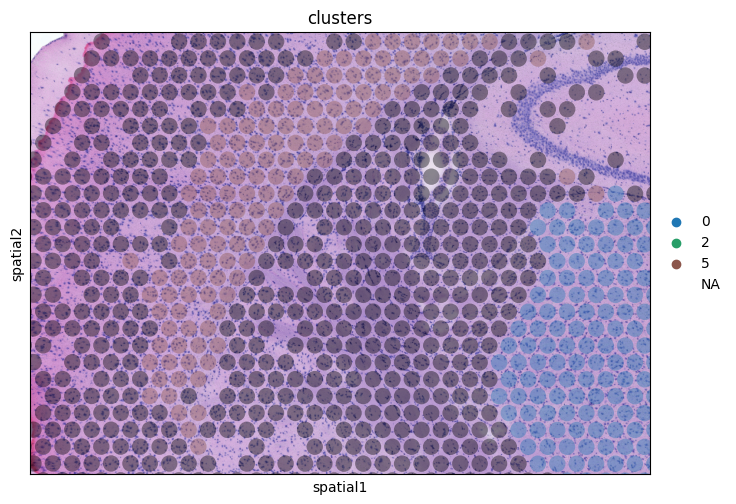

In [177]:
sc.pl.spatial(adata, img_key="hires", color="clusters", groups=["0", "2","5"], crop_coord=[3000, 10000, 5000, 10000], alpha=0.4, size=1.3)  #coord = [xmin, xmax, ymin, ymax]


In [178]:
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")  #Group by clusters and perform differential gene expression analysis using t-tets (also try 'wilcoxon')


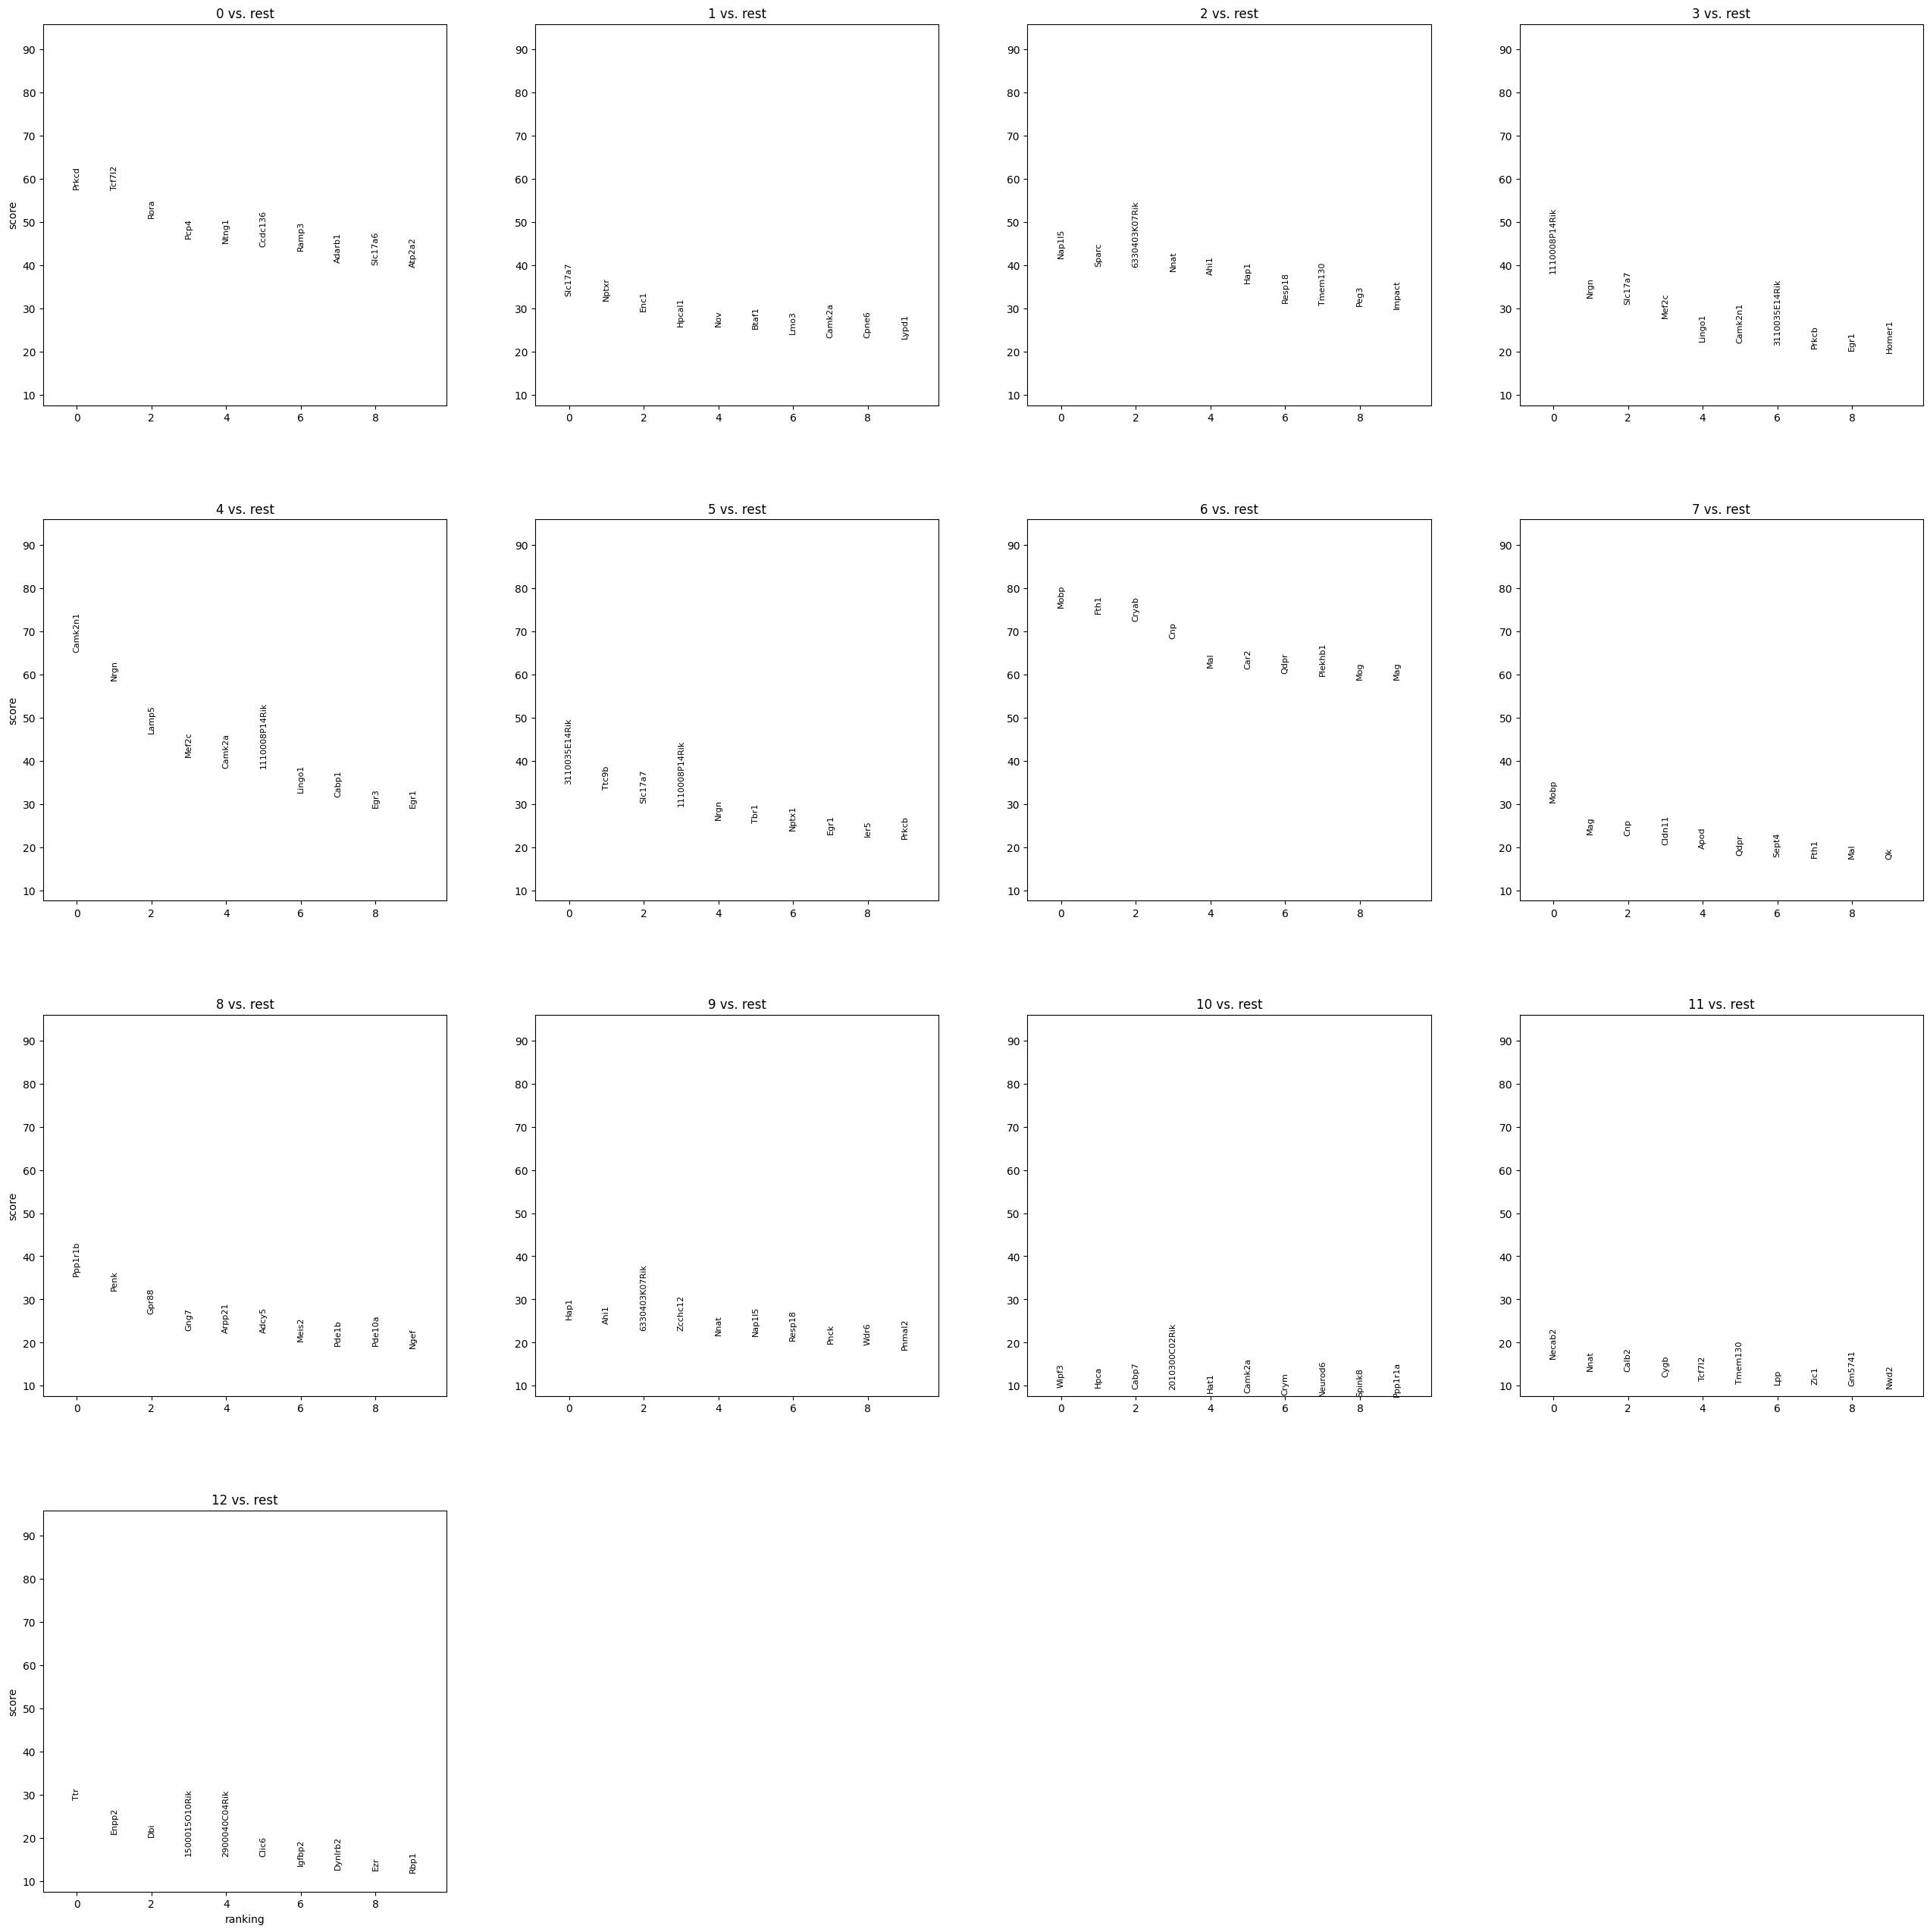

In [179]:
sc.pl.rank_genes_groups(adata, n_genes=10)


categories: 0, 1, 2, etc.
var_group_labels: 6


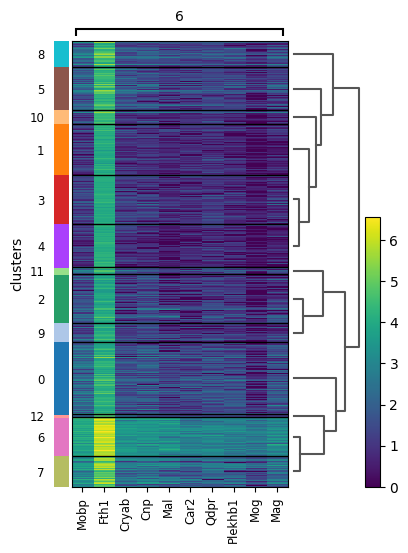

In [180]:
sc.pl.rank_genes_groups_heatmap(adata, groups="6", n_genes=10, groupby="clusters")


As we can see, the brighter band represents the exhibited gene expression. Let's map it !

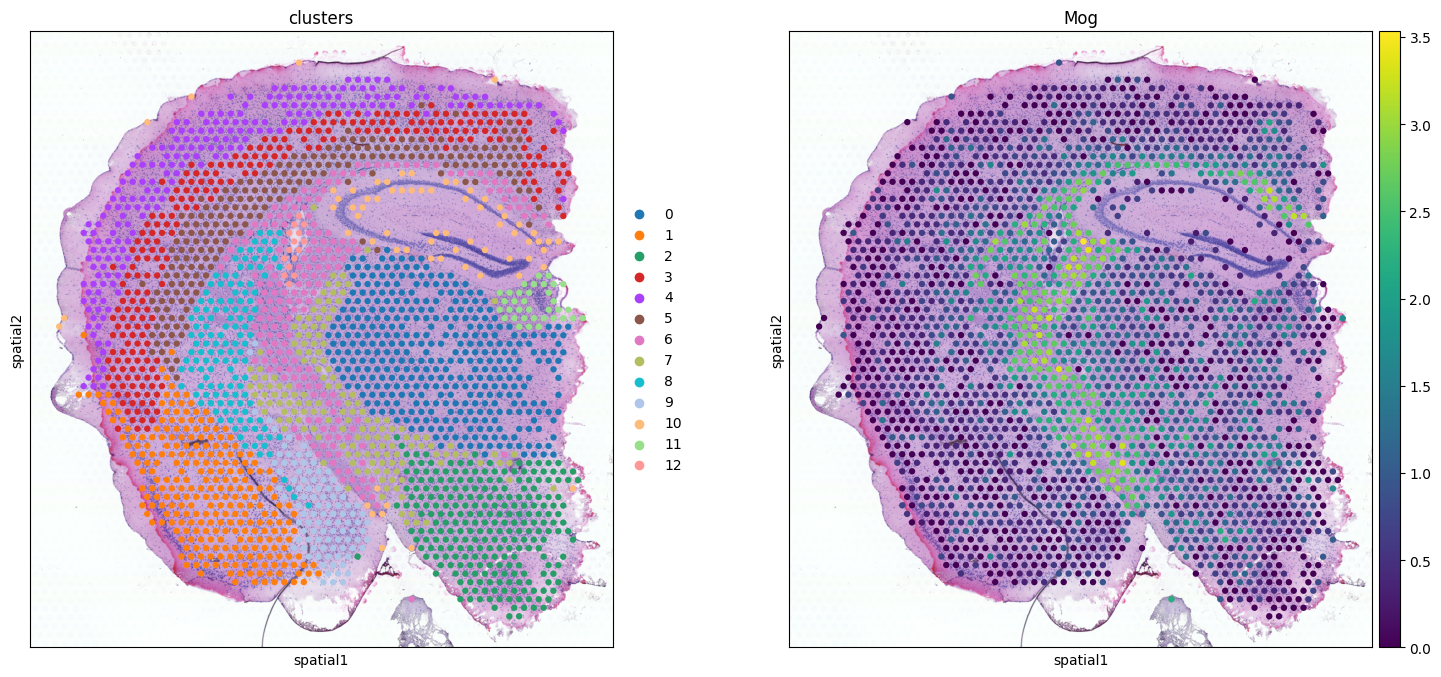

In [182]:
plt.rcParams['figure.figsize'] = (8,8)
sc.pl.spatial(adata, img_key="hires", color=["clusters", "Mog"])


In [183]:
# Obtain the top features for each cluster
result = adata.uns["rank_genes_groups"]
groups = result["names"].dtype.names
top_features = {}
n_top_genes = 10  # desired number of top genes per cluster
for group in groups:
    top_features[group] = result["names"][group][:n_top_genes]  

# Print the top features for each cluster
for group, features in top_features.items():
    print(f"Cluster {group} top features:")
    for feature in features:
        print(feature)
    print()

Cluster 0 top features:
Prkcd
Tcf7l2
Rora
Pcp4
Ntng1
Ccdc136
Ramp3
Adarb1
Slc17a6
Atp2a2

Cluster 1 top features:
Slc17a7
Nptxr
Enc1
Hpcal1
Nov
Btaf1
Lmo3
Camk2a
Cpne6
Lypd1

Cluster 2 top features:
Nap1l5
Sparc
6330403K07Rik
Nnat
Ahi1
Hap1
Resp18
Tmem130
Peg3
Impact

Cluster 3 top features:
1110008P14Rik
Nrgn
Slc17a7
Mef2c
Lingo1
Camk2n1
3110035E14Rik
Prkcb
Egr1
Homer1

Cluster 4 top features:
Camk2n1
Nrgn
Lamp5
Mef2c
Camk2a
1110008P14Rik
Lingo1
Cabp1
Egr3
Egr1

Cluster 5 top features:
3110035E14Rik
Ttc9b
Slc17a7
1110008P14Rik
Nrgn
Tbr1
Nptx1
Egr1
Ier5
Prkcb

Cluster 6 top features:
Mobp
Fth1
Cryab
Cnp
Mal
Car2
Qdpr
Plekhb1
Mog
Mag

Cluster 7 top features:
Mobp
Mag
Cnp
Cldn11
Apod
Qdpr
Sept4
Fth1
Mal
Qk

Cluster 8 top features:
Ppp1r1b
Penk
Gpr88
Gng7
Arpp21
Adcy5
Meis2
Pde1b
Pde10a
Ngef

Cluster 9 top features:
Hap1
Ahi1
6330403K07Rik
Zcchc12
Nnat
Nap1l5
Resp18
Pnck
Wdr6
Pnmal2

Cluster 10 top features:
Wipf3
Hpca
Cabp7
2010300C02Rik
Hat1
Camk2a
Crym
Neurod6
Spink8
Ppp1r1a

Cluster 1

In [184]:
# Access the marker genes results from rank_genes_groups
marker_genes = adata.uns['rank_genes_groups']

# Iterate over each group and print the marker genes
for group in marker_genes['names'].dtype.names:
    print(f"Group: {group}")
    print(marker_genes['names'][group][:10])  # Print the top 10 marker genes
    print("\n")

Group: 0
['Prkcd' 'Tcf7l2' 'Rora' 'Pcp4' 'Ntng1' 'Ccdc136' 'Ramp3' 'Adarb1'
 'Slc17a6' 'Atp2a2']


Group: 1
['Slc17a7' 'Nptxr' 'Enc1' 'Hpcal1' 'Nov' 'Btaf1' 'Lmo3' 'Camk2a' 'Cpne6'
 'Lypd1']


Group: 2
['Nap1l5' 'Sparc' '6330403K07Rik' 'Nnat' 'Ahi1' 'Hap1' 'Resp18' 'Tmem130'
 'Peg3' 'Impact']


Group: 3
['1110008P14Rik' 'Nrgn' 'Slc17a7' 'Mef2c' 'Lingo1' 'Camk2n1'
 '3110035E14Rik' 'Prkcb' 'Egr1' 'Homer1']


Group: 4
['Camk2n1' 'Nrgn' 'Lamp5' 'Mef2c' 'Camk2a' '1110008P14Rik' 'Lingo1'
 'Cabp1' 'Egr3' 'Egr1']


Group: 5
['3110035E14Rik' 'Ttc9b' 'Slc17a7' '1110008P14Rik' 'Nrgn' 'Tbr1' 'Nptx1'
 'Egr1' 'Ier5' 'Prkcb']


Group: 6
['Mobp' 'Fth1' 'Cryab' 'Cnp' 'Mal' 'Car2' 'Qdpr' 'Plekhb1' 'Mog' 'Mag']


Group: 7
['Mobp' 'Mag' 'Cnp' 'Cldn11' 'Apod' 'Qdpr' 'Sept4' 'Fth1' 'Mal' 'Qk']


Group: 8
['Ppp1r1b' 'Penk' 'Gpr88' 'Gng7' 'Arpp21' 'Adcy5' 'Meis2' 'Pde1b' 'Pde10a'
 'Ngef']


Group: 9
['Hap1' 'Ahi1' '6330403K07Rik' 'Zcchc12' 'Nnat' 'Nap1l5' 'Resp18' 'Pnck'
 'Wdr6' 'Pnmal2']


Group: 10
['Wipf3'